## Fake News Detection

#### Import library

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns


In [132]:
fake_data=pd.read_csv("/fake_news_detection_miniproject/dataset/Fake.csv")
true_data=pd.read_csv("/fake_news_detection_miniproject/dataset/True.csv")

In [133]:
fake_data.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [134]:
true_data.head()



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [135]:
true_news=pd.concat([true_data.text,true_data.title],axis=1)
fake_news=pd.concat([fake_data.text,fake_data.title],axis=1)

In [136]:
true_news.head()


,text,title
0,WASHINGTON (Reuters) - The head of a conservat...,"As U.S. budget fight looms, Republicans flip t..."
1,WASHINGTON (Reuters) - Transgender people will...,U.S. military to accept transgender recruits o...
2,WASHINGTON (Reuters) - The special counsel inv...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,FBI Russia probe helped by Australian diplomat...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Trump wants Postal Service to charge 'much mor...


In [137]:
fake_news.head()


,text,title
0,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...
1,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...
2,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...
3,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...


In [138]:
true_news["label"]="true"
fake_news["label"]="fake"

In [139]:
true_news.head()


,text,title,label
0,WASHINGTON (Reuters) - The head of a conservat...,"As U.S. budget fight looms, Republicans flip t...",true
1,WASHINGTON (Reuters) - Transgender people will...,U.S. military to accept transgender recruits o...,true
2,WASHINGTON (Reuters) - The special counsel inv...,Senior U.S. Republican senator: 'Let Mr. Muell...,true
3,WASHINGTON (Reuters) - Trump campaign adviser ...,FBI Russia probe helped by Australian diplomat...,true
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Trump wants Postal Service to charge 'much mor...,true


In [140]:
df=pd.concat([true_news,fake_news],axis=0,ignore_index=True)
df['status']=[1 if label=="fake" else 0 for label in df.label]


In [141]:
df.head()

,text,title,label,status
0,WASHINGTON (Reuters) - The head of a conservat...,"As U.S. budget fight looms, Republicans flip t...",true,0
1,WASHINGTON (Reuters) - Transgender people will...,U.S. military to accept transgender recruits o...,true,0
2,WASHINGTON (Reuters) - The special counsel inv...,Senior U.S. Republican senator: 'Let Mr. Muell...,true,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,FBI Russia probe helped by Australian diplomat...,true,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Trump wants Postal Service to charge 'much mor...,true,0


In [142]:
df.tail()

,text,title,label,status
44893,21st Century Wire says As 21WIRE reported earl...,McPain: John McCain Furious That Iran Treated ...,fake,1
44894,21st Century Wire says It s a familiar theme. ...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,fake,1
44895,Patrick Henningsen 21st Century WireRemember ...,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,fake,1
44896,21st Century Wire says Al Jazeera America will...,How to Blow $700 Million: Al Jazeera America F...,fake,1
44897,21st Century Wire says As 21WIRE predicted in ...,10 U.S. Navy Sailors Held by Iranian Military ...,fake,1


In [143]:
df = df.sample(frac = 1)


In [144]:
df.tail()

,text,title,label,status
17529,BRUSSELS (Reuters) - The United States cannot ...,EU's top diplomat defends Iran deal after Trum...,true,0
12002,MADRID/BARCELONA (Reuters) - The jailed leader...,"As Catalan vote looms, jailed leader offers ol...",true,0
41983,Only the strongest will survive in the dog-eat...,SINS OF SOCIALISM…Doctors Pumping Air Into Inf...,fake,1
25513,It s not an exaggeration to say that Donald Tr...,Hillary’s Response To Trump Tweeting He Won T...,fake,1
22601,Donald Trump s favorite morning propaganda pro...,WATCH: Fox Host Chris Wallace Scolds Fox & Fr...,fake,1


In [145]:
df.isna().sum()
df.isnull().sum()


text      0
title     0
label     0
status    0
dtype: int64

In [146]:
df.to_csv('/fake_news_detection_miniproject/dataset/nws.csv')
df.to_csv('/fake_news_detection_miniproject/dataset/news.csv')

In [147]:
# !pip install pandas     # download and install pandas library

In [168]:
df = pd.read_csv("/fake_news_detection_miniproject/dataset/news.csv")

C:\Users\user\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


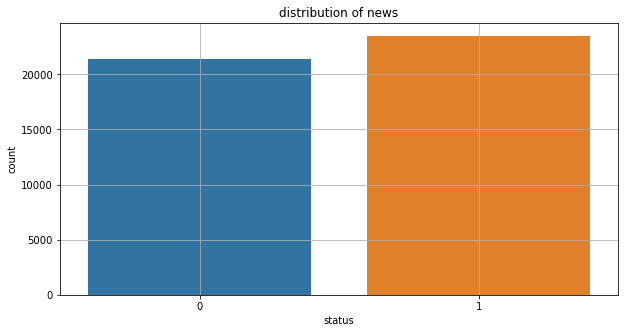

In [171]:
plt.figure(figsize=(10,5))
sns.countplot("status",data=df)
plt.title("distribution of news")
plt.grid()

In [149]:
df.head()

,Unnamed: 0,text,title,label,status
0,2031,WASHINGTON (Reuters) - The U.S. Congress will ...,"Congress will raise debt ceiling, has many opt...",true,0
1,35524,What a great fit! Tim Tebow is such a good man...,DRAFT TIM TEBOW Effort Ignites Rumors He’ll Ru...,fake,1
2,39339,When Will & Grace creators David Kohan and Max...,WILL AND GRACE Writers Explain How Their HATE ...,fake,1
3,41979,This nightmare could have all been prevented i...,AMERICA’S WORST FEAR: How Our Punishing Presid...,fake,1
4,7576,WASHINGTON (Reuters) - Republican presidential...,"Battered U.S. coal industry hopes for Trump, p...",true,0


In [150]:
df.shape

(44898, 5)

In [151]:
df.isnull().sum()

Unnamed: 0    0
text          0
title         0
label         0
status        0
dtype: int64

In [152]:
labels = df.label

In [153]:
labels.head()

0    true
1    fake
2    fake
3    fake
4    true
Name: label, dtype: object

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size = 0.2, random_state = 20)

In [156]:
x_test.shape

(8980,)

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [158]:
# initilise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [159]:
# fit and tranform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [160]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [161]:
# predicton the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [162]:
score = accuracy_score(y_test, y_pred)

In [163]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 99.43%


In [164]:
# confusion metrics
confusion_matrix(y_test, y_pred, labels=['fake', 'true'])

array([[4645,   27],
       [  24, 4284]], dtype=int64)

In [165]:
# save model
import pickle
filename = 'finalized2_model.pkl'
pickle.dump(pac, open(filename, 'wb'))

In [166]:
# save vectorizer
filename = 'vectorizer2.pkl'
pickle.dump(vector, open(filename, 'wb'))

<AxesSubplot:>

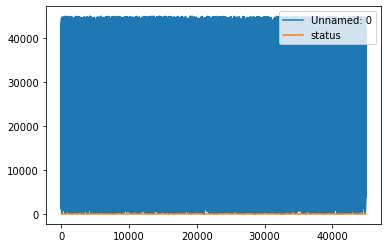

In [167]:
df.plot()